<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Univariate-Linear-Regression" data-toc-modified-id="Univariate-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Univariate Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparation</a></span><ul class="toc-item"><li><span><a href="#Importing-relevant-packages" data-toc-modified-id="Importing-relevant-packages-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Importing relevant packages</a></span></li><li><span><a href="#Defining-the-data" data-toc-modified-id="Defining-the-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Defining the data</a></span></li><li><span><a href="#Define-the-initial-w-and-b" data-toc-modified-id="Define-the-initial-w-and-b-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Define the initial w and b</a></span></li><li><span><a href="#(Optional)-Z-Score-Normalization-to-make-the-machine-learning-process-faster" data-toc-modified-id="(Optional)-Z-Score-Normalization-to-make-the-machine-learning-process-faster-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>(Optional) Z-Score Normalization to make the machine learning process faster</a></span></li><li><span><a href="#Plot-the-data-onto-a-scatter-plot" data-toc-modified-id="Plot-the-data-onto-a-scatter-plot-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Plot the data onto a scatter plot</a></span></li></ul></li><li><span><a href="#Set-up-the-model" data-toc-modified-id="Set-up-the-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Set up the model</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-cost-function" data-toc-modified-id="Set-up-the-cost-function-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Set up the cost function</a></span></li><li><span><a href="#Set-up-the-Gradient-Descent" data-toc-modified-id="Set-up-the-Gradient-Descent-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Set up the Gradient Descent</a></span></li><li><span><a href="#Test-the-implement" data-toc-modified-id="Test-the-implement-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Test the implement</a></span></li><li><span><a href="#Draw-the-diagram" data-toc-modified-id="Draw-the-diagram-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Draw the diagram</a></span></li></ul></li><li><span><a href="#Do-the-prediction" data-toc-modified-id="Do-the-prediction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Do the prediction</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Regularization</a></span></li></ul></li></ul></div>


# Univariate Linear Regression

## Preparation

### Importing relevant packages

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

### Defining the data

In [2]:
x_train = np.array(np.random.uniform(1,10,100)) #Modify this.
y_train = np.array(np.random.uniform(1,10,100)) #Modify this.

In [3]:
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (100,), X Type:<class 'numpy.ndarray'>)
[3.3156059  1.57250336 6.83926326 5.37758988 5.99716407 9.59724372
 4.22702211 5.34030053 7.69180079 1.39681562 7.12729617 4.42328381
 7.77693317 8.02020379 5.92453503 4.40600218 4.39960049 2.70944469
 3.84765488 6.30762564 1.75838369 1.37836483 1.66402576 7.34238179
 6.9768696  3.72302057 4.95908409 7.68975486 1.63057345 6.96711598
 7.63943745 5.05502713 3.93524158 9.89307368 1.64851707 2.3076284
 5.11484261 3.07535247 3.8039243  2.84598277 5.26741967 5.3989853
 4.52563057 2.7154368  9.21633411 8.05452513 3.6510128  4.90136092
 2.1793527  7.51601241 8.0458643  2.30435596 4.44369663 3.02591251
 3.45298413 6.25209049 2.72673217 7.38507405 4.99577849 9.25437895
 5.30577105 5.43302955 8.46182499 8.25965741 6.85113215 8.39882359
 7.64042478 9.68589623 5.41207384 6.4370854  9.17914265 9.81844981
 4.69423115 8.63113747 6.85616257 8.48147785 9.46808571 9.17933751
 4.23037598 8.23780321 7.90469471 1.06963327 9.73967059 9.57277721
 4.20923973 7.7

### Define the initial w and b

In [4]:
w_init = 1
b_init = 0

### (Optional) Z-Score Normalization to make the machine learning process faster

In [5]:
def z_score_normal(x):
    mu = np.mean(x)
    sgm = np.std(x)
    x_z = (x - mu) / sgm
    return x_z

In [6]:
x_z = z_score_normal(x_train)
y_z = z_score_normal(y_train)
print(x_z)
print(y_z)

[-0.91441961 -1.59715707  0.46572458 -0.10678285  0.13589163  1.54596888
 -0.55743661 -0.12138832  0.79964602 -1.66597035  0.57854116 -0.48056493
  0.83299063  0.92827473  0.10744433 -0.48733379 -0.4898412  -1.15184051
 -0.70602696  0.25749305 -1.52435157 -1.67319715 -1.56130963  0.66278578
  0.51962216 -0.75484366 -0.27070297  0.79884468 -1.57441221  0.51580187
  0.77913638 -0.23312405 -0.67172105  1.66183939 -1.56738406 -1.30922369
 -0.20969556 -1.00852195 -0.72315533 -1.09836135 -0.14993426 -0.0984027
 -0.44047781 -1.14949352  1.3967744   0.9417177  -0.78304762 -0.29331195
 -1.35946665  0.73079332  0.93832542 -1.31050544 -0.47256965 -1.02788657
 -0.86061139  0.23574108 -1.14506936  0.67950746 -0.25633053  1.41167579
 -0.13491281 -0.08506827  1.10124868  1.0220638   0.47037339  1.07657233
  0.77952309  1.58069224 -0.09327619  0.30819978  1.38220728  1.63261075
 -0.37444042  1.16756491  0.4723437   1.10894631  1.49538033  1.3822836
 -0.55612297  1.01350395  0.8830322  -1.79412096  1.6

### Plot the data onto a scatter plot

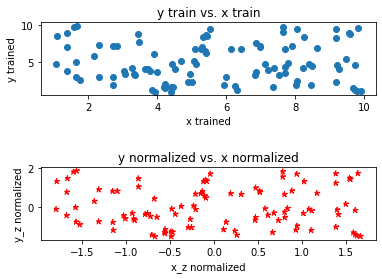

In [7]:
fig = plt.figure(1)
ax1=plt.subplot(2,1,1)
plt.scatter(x_train,y_train,marker='o')
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
ax2=plt.subplot(2,1,2)
plt.scatter(x_z,y_z,color="r",marker="*",linestyle="dashed")
plt.xlabel("x_z normalized")
plt.ylabel("y_z normalized")
plt.title('y normalized vs. x normalized')
plt.subplots_adjust(wspace=0,hspace=1)
plt.show()

## Set up the model

In [8]:
def predict(x,w,b):
    p = w * x + b
    return p

Text(0.5, 1.0, 'y train vs. x train')

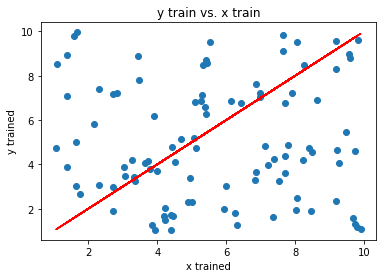

In [9]:
f_wb = predict(x_train,w_init,b_init)
plt.scatter(x_train,y_train,marker='o')
plt.plot(x_train,f_wb,marker='o',markersize=0.1,color="r")
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')

### Set up the cost function

In [10]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = predict(x[i],w,b)
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2*m)
    return cost

In [11]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at initial w : {cost}')

Cost at initial w : 6.747739843224873


### Set up the Gradient Descent

In [12]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        f_wb_i = predict(x[i],w,b)
        dj_dw = dj_dw + (f_wb_i - y[i]) * x[i]
        dj_db = dj_db + (f_wb_i - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [13]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: 0.20610315971693347
dj_dw at initial w,b: 8.040104241617774


In [14]:
def gradient_descent(x,y,w_int,b_int,cost_func,gradient_func,alpha,iteration): 
    w = copy.deepcopy(w_int)
    b = b_int
    J = cost_func(x,y,w_int,b_int)
    for i in range(iteration):
        dj_dw,dj_db = gradient_func(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = cost_func(x,y,w,b)
        if i% math.ceil(iteration / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J}")
    return w,b,J

### Test the implement

In [15]:
alpha = 5e-3 #Modify this.
iteration = 10000 #Modify this.

w_final, b_final,J = gradient_descent(x_train, y_train, w_init, b_init,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iteration)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 6.45483081022459
Iteration 1000: Cost 3.6160367035500447
Iteration 2000: Cost 3.2041758715337756
Iteration 3000: Cost 3.130271983974231
Iteration 4000: Cost 3.1170107457795826
Iteration 5000: Cost 3.1146311627256678
Iteration 6000: Cost 3.1142041727698757
Iteration 7000: Cost 3.114127554127778
Iteration 8000: Cost 3.1141138057567974
Iteration 9000: Cost 3.114111338763135
b,w found by gradient descent: 5.62,-0.047775098105693095 


### Draw the diagram

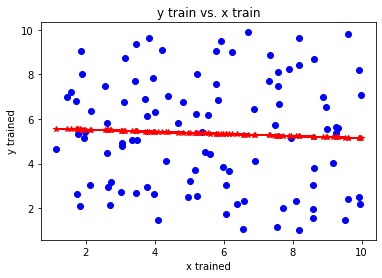

In [16]:
plt.scatter(x_train,y_train,color="b",marker='o')
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
f_final = predict(x_train,w_final,b_final)
plt.plot(x_train,f_final,color="r",marker="*",)

## Do the prediction

Predicted value for x = 13 is 4.997495708458136


Text(13, 5.997495708458136, 'This is the predict value')

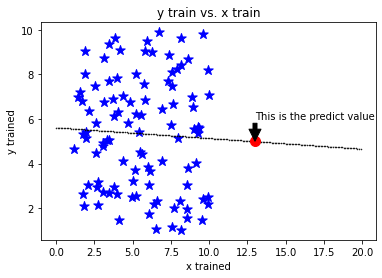

In [17]:
x_value = 13 #Modify this.
y_predict = predict(x_value,w_final,b_final)
print(f"Predicted value for x = {x_value} is {y_predict}")
plt.scatter(x_train,y_train,color="b",marker='*',s=100)
plt.xlabel("x trained")
plt.ylabel("y trained")
plt.title('y train vs. x train')
x = np.arange(0, 20, 0.1)
y = predict(x,w_final,b_final)
plt.plot(x,y,color="black",marker=".",linewidth=0.1,markersize=1)
plt.plot(x_value,y_predict,color="r",marker="o",markersize=10)
plt.annotate("This is the predict value", xy=(x_value,y_predict), xytext=(x_value, y_predict+1),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )